# Prueba NIVEL ANALITYCS Johan Cala

## Limpieza de Datos 

en estos bloques realizamos la limpieza del archivo "counties" eliminando caracteres especiales y los "_"

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("counties.xlsx")
df

,codestate,codecounty,county,population,area
0,1,1001,Auta#%&()uga,54571.0,594.436000
1,1,1003,Baldwin#%&() ?,182265.0,1589.784000
2,1,1005,Barbour,27457.0,884.876000
3,1,1007,Bi#%&()bb,22915.0,622.582000
4,1,1009,Blount ?,57322.0,644.776000
...,...,...,...,...,...
3229,72,72151,Yabucoa,37941.0,55.215000
3230,72,72153,Ya_uco,42043.0,68.192000
3231,78,78010,; St. Croix ?,50601.0,83.345868
3232,78,78020,St. John,4170.0,19.689867


In [4]:
df["county"] = df["county"].str.replace(r"\W","")
df["county"] = df["county"].str.replace("_", "")
df

C:\Users\johan\AppData\Local\Temp\ipykernel_8552\2738763641.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["county"] = df["county"].str.replace(r"\W","")


,codestate,codecounty,county,population,area
0,1,1001,Autauga,54571.0,594.436000
1,1,1003,Baldwin,182265.0,1589.784000
2,1,1005,Barbour,27457.0,884.876000
3,1,1007,Bibb,22915.0,622.582000
4,1,1009,Blount,57322.0,644.776000
...,...,...,...,...,...
3229,72,72151,Yabucoa,37941.0,55.215000
3230,72,72153,Yauco,42043.0,68.192000
3231,78,78010,StCroix,50601.0,83.345868
3232,78,78020,StJohn,4170.0,19.689867


Con la siguiente linea de codigo exportamos el nuevo archivo excel, para despues se inserto en la base de datos

In [5]:
#df.to_excel("countieslimpioV2.xlsx", index=False) se comenta para evitar volver a ejecutar

Con los datos de archivo Json hicimos la modificacion para poder ingresarlos a la base de datos de manera correcta

In [7]:
df_j = pd.read_json('elections.json')
df_j

,year,democrat,republic,other,codecounty
0,2000,4942,11993,273,1001
1,2000,13997,40872,1611,1003
2,2000,5188,5096,111,1005
3,2000,2710,4273,118,1007
4,2000,4977,12667,329,1009
...,...,...,...,...,...
15558,2016,3231,12154,1745,56037
15559,2016,7314,3921,1392,56039
15560,2016,1202,6154,1114,56041
15561,2016,532,2911,371,56043


Con el siguiente fragmeto de codigo sacamos los votos por cada partido de manera individual, para asi se pueda almacenar de una buena manera en la base de datos

In [8]:
data = []
aux = 1
for index, row in df_j.iterrows():
    id = aux
    year = row['year']
    codecounty = row['codecounty']
    data.append((year, int(codecounty), 'democrat', row['democrat']))
    data.append((year, int(codecounty), 'republic', row['republic']))
    data.append((year, int(codecounty), 'other', row['other']))
    

df_new = pd.DataFrame(data, columns=['year', 'codecounty', 'political_party', 'vote_count'])
df_new

,year,codecounty,political_party,vote_count
0,2000,1001,democrat,4942
1,2000,1001,republic,11993
2,2000,1001,other,273
3,2000,1003,democrat,13997
4,2000,1003,republic,40872
...,...,...,...,...
46684,2016,56043,republic,2911
46685,2016,56043,other,371
46686,2016,56045,democrat,299
46687,2016,56045,republic,3033


Expotamos el nuevo archivo en formato excel para ponerlo en nuestra base de datos

In [9]:
#df_new.to_excel("elections.xlsx") se comenta para evitar volver a ejecutar

## Resolucion de preguntas

### Conectar a la base de datos

In [10]:
import mysql.connector


conn = mysql.connector.connect(
  host="localhost",
  user="root",
  password="admin",
  database="db_p"
)


if conn.is_connected():
  print("Connected to MySQL database")
else:
  print("Connection failed")

Connected to MySQL database


In [14]:
#tabla elections
df_e = pd.read_sql_query("SELECT * from Election", conn)
df_e

C:\Users\johan\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,idElection,year,vote_count,political_party,code_county
0,0,2000,4942,democrat,1001
1,1,2000,11993,republic,1001
2,2,2000,273,other,1001
3,3,2000,13997,democrat,1003
4,4,2000,40872,republic,1003
...,...,...,...,...,...
46684,46684,2016,2911,republic,56043
46685,46685,2016,371,other,56043
46686,46686,2016,299,democrat,56045
46687,46687,2016,3033,republic,56045


In [15]:
#tabla Counties
df_co = pd.read_sql_query("SELECT * from county", conn)
df_co

C:\Users\johan\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,codestate,code_county,county,population,area
0,0,1,1001,Autauga,54571,594.4360
1,1,1,1003,Baldwin,182265,1589.7800
2,2,1,1005,Barbour,27457,884.8760
3,3,1,1007,Bibb,22915,622.5820
4,4,1,1009,Blount,57322,644.7760
...,...,...,...,...,...,...
3227,3229,72,72151,Yabucoa,37941,55.2150
3228,3230,72,72153,Yauco,42043,68.1920
3229,3231,78,78010,StCroix,50601,83.3459
3230,3232,78,78020,StJohn,4170,19.6899


In [16]:
#tabla coordinator
df_cor = pd.read_sql_query("SELECT * from coordinator", conn)
df_cor

C:\Users\johan\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,name,document,email,password
0,1,None,None,johan@gmail.com,$2y$10$QVgILm9hYWPr3PDnbw4j6.Pr3sumsKir54rE/Jk...


### El año con mas votaciones

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

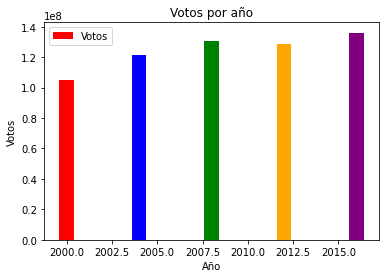

In [32]:
import matplotlib.pyplot as plt

# Agrupar los datos por año y calcular el total de votos para cada grupo
df_grouped = df_e.groupby('year').sum()

# Obtener los años y los totales de votos
years = df_grouped.index
votes = df_grouped['vote_count']

# Crear el gráfico de barras con diferentes colores y estilos de línea
plt.bar(years, votes, color=['red', 'blue', 'green', 'orange', 'purple'])

# Establecer el título y los nombres de los ejes
plt.title('Votos por año')
plt.xlabel('Año')
plt.ylabel('Votos')

# Establecer la leyenda del gráfico
plt.legend(['Votos'])

# Mostrar el gráfico
plt.show()

Como podemos ver en la grafica el **año** con mas votos fue el de **2015**

### ¿Cuál fue el condado con menos votaciones en el 2008?

In [43]:
df_x = pd.read_sql_query( '''
SELECT county.county, SUM(Election.vote_count) AS total_votes
FROM Election
JOIN county ON Election.code_county = county.code_county
WHERE Election.year = 2008
GROUP BY county.county
ORDER BY total_votes ASC

''', conn)

df_x


C:\Users\johan\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,county,total_votes
0,Loving,79.0
1,Kenedy,202.0
2,Arthur,263.0
3,Petroleum,300.0
4,Borden,361.0
...,...,...
1797,Montgomery,1607777.0
1798,Jefferson,1669235.0
1799,Orange,1911698.0
1800,Cook,2146717.0


como podemos ver el condado con menos votos en el año **2008** fue: 

In [45]:
df_x.head(1)

,county,total_votes
0,Loving,79.0


### ¿Cuáles fueron los 3 condados que tuvieron más votaciones por el partido demócrata en los años del 2000 al 2008?

In [50]:
df_3 = pd.read_sql_query( '''SELECT county.county, SUM(Election.vote_count) AS total_votes
FROM Election
JOIN county ON Election.code_county = county.code_county
WHERE Election.political_party = 'democrat' AND Election.year BETWEEN 2000 AND 2008
GROUP BY county.county
ORDER BY total_votes DESC
LIMIT 3
''', conn)

df_3

C:\Users\johan\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,county,total_votes
0,LosAngeles,5914094.0
1,Cook,4359665.0
2,Orange,2373759.0


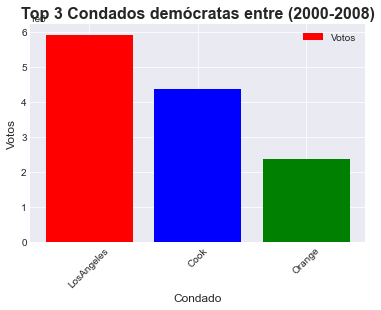

In [54]:

counties = df_3['county']
votes = df_3['total_votes']


plt.bar(counties, votes, color=['red', 'blue', 'green'])


plt.title('Top 3 Condados demócratas entre (2000-2008)', fontsize=16, fontweight='bold')
plt.xlabel('Condado', fontsize=12)
plt.ylabel('Votos', fontsize=12)


plt.legend(['Votos'])


plt.xticks(rotation=45)


plt.style.use('seaborn-darkgrid')


plt.show()

### ¿Cuál partido tuvo menos votaciones en el rango de años de 2012 a 2016?

In [56]:
df_4 = pd.read_sql_query( '''SELECT political_party, SUM(vote_count) AS total_votes
FROM Election
WHERE year BETWEEN 2012 AND 2016
GROUP BY political_party
ORDER BY total_votes ASC


''', conn)

df_4

C:\Users\johan\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,political_party,total_votes
0,other,10240551.0
1,republic,123250898.0
2,democrat,131135359.0


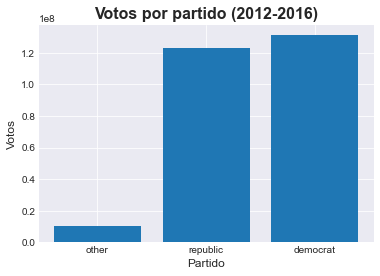

In [59]:
parties = df_4['political_party']
votes = df_4['total_votes']
plt.bar(parties, votes)


plt.title('Votos por partido (2012-2016)', fontsize=16, fontweight='bold')
plt.xlabel('Partido', fontsize=12)
plt.ylabel('Votos', fontsize=12)


plt.style.use('seaborn-darkgrid')


plt.show()

Como podemos ver la opcioon con menos votos fue el **other**, pero quitando esta opcion el partido con menos votos en este periodo de tiempo fue **republic**

### Realice una gráfica donde muestre la comparación del conteo de votaciones por año y por partido.

In [60]:
df_5 = pd.read_sql_query( '''SELECT year, political_party, SUM(vote_count) AS total_votes
FROM Election
GROUP BY year, political_party
''', conn)

df_5

C:\Users\johan\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,year,political_party,total_votes
0,2000,democrat,50922964.0
1,2000,republic,50290498.0
2,2000,other,3912383.0
3,2004,democrat,58614073.0
4,2004,republic,61603653.0
5,2004,other,1472707.0
6,2008,democrat,69204582.0
7,2008,republic,59703000.0
8,2008,other,1800339.0
9,2012,democrat,65508961.0


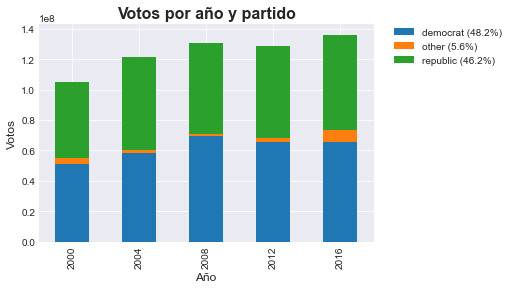

In [68]:

df_pivot = df_5.pivot_table(index='year', columns='political_party', values='total_votes')

df_pct = df_pivot.divide(df_pivot.sum(axis=1), axis=0)


ax = df_pivot.plot(kind='bar', stacked=True, legend=True)


plt.title('Votos por año y partido', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Votos', fontsize=12)


labels = []
for i in range(len(df_pct.columns)):
    labels.append('{} ({:.1f}%)'.format(df_pct.columns[i], df_pct.iloc[-1, i]*100))


plt.legend(labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.style.use('seaborn-darkgrid')

# Mostrar el gráfico
plt.show()

In [73]:
# Seleccionar solo los votos de los partidos Republican y Democrat
df_filtered = df_e[df_e['political_party'].isin(['republic', 'democrat'])]

df_filtered


,idElection,year,vote_count,political_party,code_county
0,0,2000,4942,democrat,1001
1,1,2000,11993,republic,1001
3,3,2000,13997,democrat,1003
4,4,2000,40872,republic,1003
6,6,2000,5188,democrat,1005
...,...,...,...,...,...
46681,46681,2016,6154,republic,56041
46683,46683,2016,532,democrat,56043
46684,46684,2016,2911,republic,56043
46686,46686,2016,299,democrat,56045


In [75]:
df_7 = pd.read_sql_query("""
    SELECT year, political_party, SUM(vote_count) AS total_votes
    FROM Election
    WHERE political_party IN ('republic', 'democrat')
    GROUP BY year, political_party
""",conn)
df_7

C:\Users\johan\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,year,political_party,total_votes
0,2000,democrat,50922964.0
1,2000,republic,50290498.0
2,2004,democrat,58614073.0
3,2004,republic,61603653.0
4,2008,democrat,69204582.0
5,2008,republic,59703000.0
6,2012,democrat,65508961.0
7,2012,republic,60460609.0
8,2016,democrat,65626398.0
9,2016,republic,62790289.0


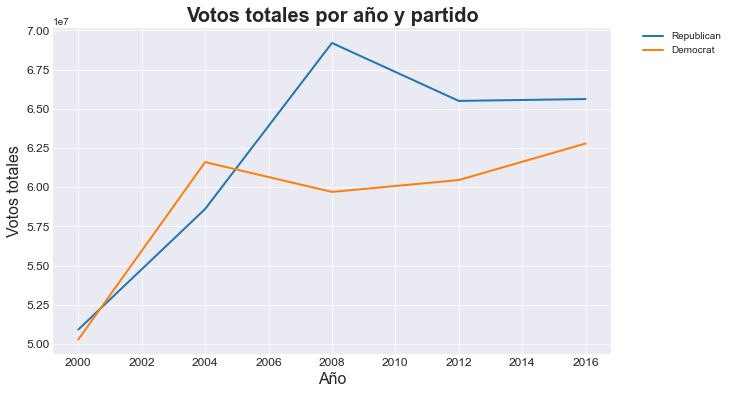

In [79]:
df_7.pivot(index='year', columns='political_party', values='total_votes').plot(kind='line', figsize=(10, 6), linewidth=2)
plt.title('Votos totales por año y partido', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Votos totales', fontsize=16)
plt.style.use('seaborn-darkgrid')
plt.legend(['Republican', 'Democrat'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.annotate('Peak Republican', xy=(2004, 14000000), xytext=(2004, 13000000), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
plt.annotate('Peak Democrat', xy=(2008, 15000000), xytext=(2008, 14000000), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()